# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# set url for loop and capture data from json for later graphing
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
cities_data = []

for city in cities: 

    # Build query URL
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Get weather data / API response
    weather_response = requests.get(query_url)

    # try & except block 
    try: 
        weather_json = weather_response.json()  
        lat = weather_json["coord"]["lat"]
        lng = weather_json["coord"]["lon"]
        maximum = weather_json["main"]["temp_max"]
        humidity = weather_json["main"]["humidity"]
        cloudiness = weather_json["clouds"]["all"]
        wind_speed = weather_json["wind"]["speed"]
        country = weather_json["sys"]["country"]
        date = weather_json["dt"]
        temp = weather_json["main"]["temp"]
        
        # append the dictionary to the list 
        city_data = {"City":city, "Lat":lat, "Lng": lng, "Maximum":maximum, 
                     "Humidity":humidity, "Cloudiness":cloudiness, "Wind Speed": wind_speed, 
                     "Country":country, "Date":date}
        
        cities_data.append(city_data)
         
        # print
        print(f"The weather in {city} is {temp} degrees fahrenheit") 
        
        
    except:
        print(f"{city} not found. Skipping...")

The weather in luanda is 69.8 degrees fahrenheit
The weather in punta arenas is 39.31 degrees fahrenheit
The weather in rikitea is 71.19 degrees fahrenheit
The weather in lagoa is 69.94 degrees fahrenheit
The weather in sitka is 57.09 degrees fahrenheit
The weather in arraial do cabo is 62.56 degrees fahrenheit
The weather in jamestown is 70.32 degrees fahrenheit
The weather in mataura is 53.47 degrees fahrenheit
The weather in hilo is 77.4 degrees fahrenheit
The weather in chuy is 59.4 degrees fahrenheit
The weather in khandyga is 63.01 degrees fahrenheit
The weather in ushuaia is 37.06 degrees fahrenheit
The weather in saskylakh is 54.77 degrees fahrenheit
The weather in chokurdakh is 45.46 degrees fahrenheit
taolanaro not found. Skipping...
The weather in mehamn is 44.64 degrees fahrenheit
The weather in riyadh is 89.74 degrees fahrenheit
The weather in new norfolk is 46.45 degrees fahrenheit
The weather in ilulissat is 42.82 degrees fahrenheit
The weather in mar del plata is 51.4 d

The weather in severo-kurilsk is 56.75 degrees fahrenheit
The weather in tabora is 68.74 degrees fahrenheit
saleaula not found. Skipping...
The weather in bengkulu is 75.45 degrees fahrenheit
The weather in loanda is 69.8 degrees fahrenheit
phan rang not found. Skipping...
The weather in veraval is 82.47 degrees fahrenheit
The weather in iracoubo is 78.51 degrees fahrenheit
The weather in aracuai is 63.18 degrees fahrenheit
The weather in gra liyia is 78.98 degrees fahrenheit
The weather in codrington is 47.08 degrees fahrenheit
The weather in sao domingos is 71.89 degrees fahrenheit
The weather in burns lake is 63.82 degrees fahrenheit
The weather in pemangkat is 79.57 degrees fahrenheit
The weather in nome is 51.87 degrees fahrenheit
The weather in cabedelo is 74.07 degrees fahrenheit
The weather in yerofey pavlovich is 68.32 degrees fahrenheit
The weather in angoram is 81.86 degrees fahrenheit
mutsamudu not found. Skipping...
sentyabrskiy not found. Skipping...
The weather in fairba

The weather in mfou is 71.46 degrees fahrenheit
The weather in eisiskes is 64.74 degrees fahrenheit
The weather in waynesboro is 76.14 degrees fahrenheit
The weather in mecca is 87.4 degrees fahrenheit
The weather in dubbo is 50.13 degrees fahrenheit
The weather in cetraro is 73.24 degrees fahrenheit
The weather in sonderso is 55.38 degrees fahrenheit
The weather in imbituba is 61.83 degrees fahrenheit
The weather in kindersley is 80.62 degrees fahrenheit
The weather in waipawa is 51.69 degrees fahrenheit
The weather in olga is 85.14 degrees fahrenheit
The weather in muros is 64.4 degrees fahrenheit
The weather in dimitrovgrad is 61.68 degrees fahrenheit
The weather in prince george is 65.64 degrees fahrenheit
The weather in fomboni is 77.68 degrees fahrenheit
The weather in curup is 67.5 degrees fahrenheit
The weather in qandala is 91.02 degrees fahrenheit
The weather in omboue is 73.27 degrees fahrenheit
The weather in constitucion is 53.13 degrees fahrenheit
The weather in mackay is

The weather in digby is 62.64 degrees fahrenheit
The weather in landsberg is 62.58 degrees fahrenheit
grand centre not found. Skipping...
The weather in mersing is 75.11 degrees fahrenheit
The weather in banda aceh is 80.96 degrees fahrenheit
The weather in lewiston is 61.12 degrees fahrenheit
The weather in bonavista is 53.6 degrees fahrenheit
The weather in pajapan is 84.36 degrees fahrenheit
The weather in saint anthony is 88.47 degrees fahrenheit
The weather in severnyy is 60.84 degrees fahrenheit
The weather in trelew is 46.94 degrees fahrenheit
The weather in quesnel is 64.9 degrees fahrenheit
The weather in la crosse is 84.85 degrees fahrenheit
The weather in san andres is 82.42 degrees fahrenheit
wa not found. Skipping...
The weather in mesyagutovo is 57.25 degrees fahrenheit
The weather in vangaindrano is 65.97 degrees fahrenheit
The weather in vinh is 76.93 degrees fahrenheit
The weather in verkhnevilyuysk is 63.54 degrees fahrenheit
The weather in kudahuvadhoo is 78.84 degre

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
cities_df.to_csv = output_data_file

In [12]:
cities_df = pd.DataFrame(cities_data)
cities_df.head()

,City,Lat,Lng,Maximum,Humidity,Cloudiness,Wind Speed,Country,Date
0,luanda,-8.8368,13.2343,69.80,88,20,1.14,AO,1627086204
1,punta arenas,-53.1500,-70.9167,39.31,81,0,24.16,CL,1627086164
2,rikitea,-23.1203,-134.9692,71.19,59,60,14.05,PF,1627086204
3,lagoa,39.0500,-27.9833,69.94,96,100,12.21,PT,1627086156
4,sitka,57.0531,-135.3300,57.09,82,90,13.80,US,1627086205


In [16]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


In [10]:
cities_df.loc[cities_df["Humidity"] > 100, :]

,City,Lat,Lng,Maximum,Humidity,Cloudiness,Wind Speed,Country,Date


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
# skipping step 

In [15]:
# skipping step 

In [16]:
# skipping step 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

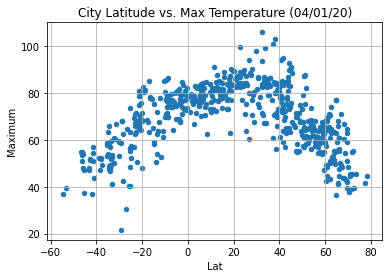

In [23]:
# scatter plot / Latitude vs. Temperature
cities_df.plot(x="Lat", y="Maximum", kind="scatter", title="City Latitude vs. Max Temperature (04/01/20)", grid=True)
plt.savefig("../output_data/Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

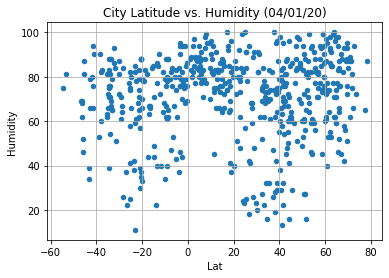

In [24]:
# scatter plot / Latitude vs. Humidity
cities_df.plot(x="Lat", y="Humidity", kind="scatter", title="City Latitude vs. Humidity (04/01/20)", grid=True)
plt.savefig("../output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

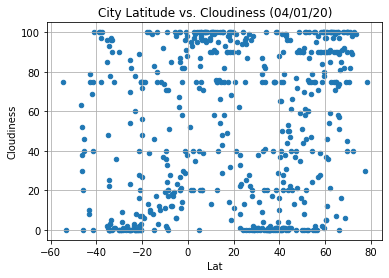

In [25]:
# scatter plot / Latitude vs. Cloudiness
cities_df.plot(x="Lat", y="Cloudiness", kind="scatter", title="City Latitude vs. Cloudiness (04/01/20)", grid=True)
plt.savefig("../output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

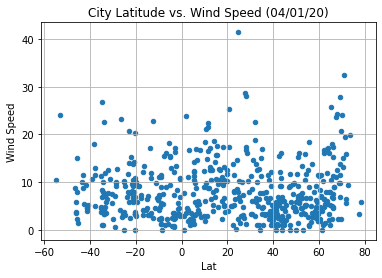

In [26]:
# scatter plot / Latitude vs. Wind Speed PLot
cities_df.plot(x="Lat", y="Wind Speed", kind="scatter", title="City Latitude vs. "Wind Speed" (04/01/20)", grid=True)
plt.savefig("../output_data/Fig4.png")
plt.show()

In [28]:
# Southern and Northern DF 
southern_df = cities_df.loc[pd.to_numeric(cities_df["Lat"]).astype(float) < 0, :]
northern_df = cities_df.loc[pd.to_numeric(cities_df["Lat"]).astype(float) > 0, :]

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The rvalue is -0.6831845912504521.


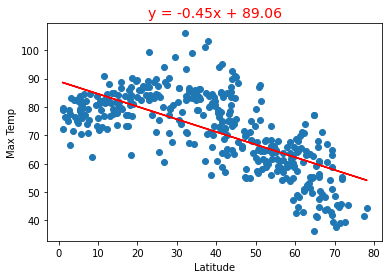

In [46]:
x_values = northern_df["Lat"]
y_values = northern_df["Maximum"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.plot(x_values, regress_values, "r-")
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
                                                        
                                                        
plt.savefig("../output_data/Fig5.png")


print(f"The rvalue is {rvalue}.")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The rvalue is 0.7652924008461188.


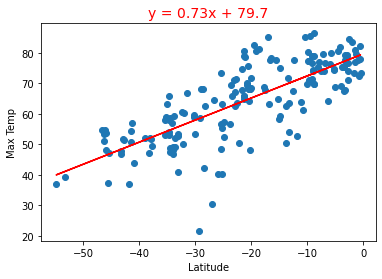

In [53]:
x_values = southern_df["Lat"]
y_values = southern_df["Maximum"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.savefig("../output_data/Fig6.png")

print(f"The rvalue is {rvalue}.")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The rvalue is -0.07427153416236985.


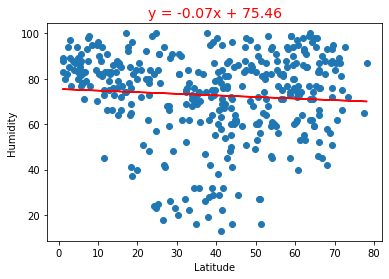

In [54]:
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("../output_data/Fig7.png")

print(f"The rvalue is {rvalue}.")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The rvalue is 0.06153555415556955.


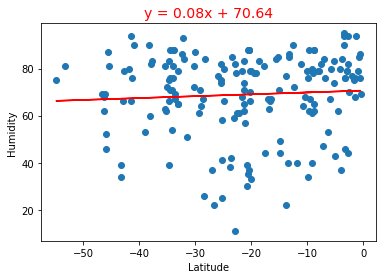

In [55]:
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("../output_data/Fig8.png")

print(f"The rvalue is {rvalue}.")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The rvalue is 0.001874425654409427.


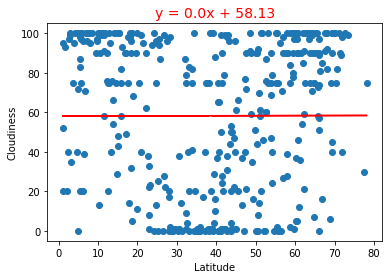

In [56]:
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig("../output_data/Fig9.png")

print(f"The rvalue is {rvalue}.")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The rvalue is 0.08819199869261206.


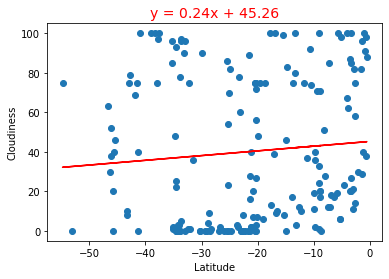

In [57]:
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig("../output_data/Fig10.png")

print(f"The rvalue is {rvalue}.")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The rvalue is -0.03735517999734665.


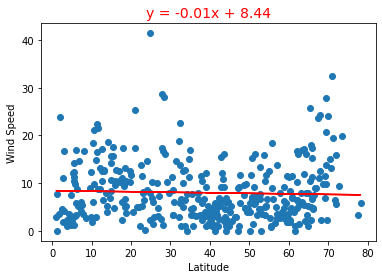

In [58]:
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig("../output_data/Fig11.png")

print(f"The rvalue is {rvalue}.")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The rvalue is -0.0938967484459675.


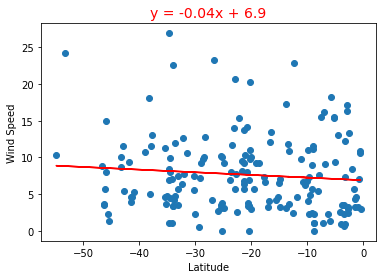

In [59]:
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig("../output_data/Fig12.png")

print(f"The rvalue is {rvalue}.")

plt.show()